In [3]:
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import pmdarima as pm
from pmdarima import model_selection

%matplotlib inline

In [4]:
start = datetime.datetime(1998,1,1)
end = datetime.datetime.now()

In [5]:
ff_df = pd.read_csv('data/fedfunds2.csv')
ff_df = ff_df[::-1]
ff_df['Date'] = pd.to_datetime(ff_df['Date'])
ff_df.set_index('Date')

,Rate
Date,
2020-01-29,1.55
2020-01-28,1.55
2020-01-27,1.55
2020-01-24,1.55
2020-01-23,1.55
...,...
1998-01-07,5.29
1998-01-06,5.35
1998-01-05,5.51


In [6]:
libor_df = pd.read_csv('data/libor1.csv')
libor_df = libor_df[::-1]
libor_df['Date'] = pd.to_datetime(libor_df['Date'])
libor_df.set_index('Date')

,Rate
Date,
2020-01-24,1.6595
2020-01-23,1.66088
2020-01-22,1.65938
2020-01-21,1.6595
2020-01-20,1.65338
...,...
1998-01-08,5.62891
1998-01-07,5.62891
1998-01-06,5.66797


In [7]:
mortgage_df = pd.read_csv('data/mortgage2.csv')
mortgage_df = mortgage_df[::-1]
mortgage_df['Date'] = pd.to_datetime(mortgage_df['Date'])
mortgage_df.set_index('Date')

,Rate
Date,
2020-01-01,3.51
2019-12-01,3.74
2019-11-01,3.68
2019-10-01,3.78
2019-09-01,3.64
...,...
1998-05-01,7.07
1998-04-01,7.15
1998-03-01,7.08


In [8]:
vacancy_df = pd.read_csv('data/vacancies2.csv')
vacancy_df = vacancy_df[::-1]
vacancy_df['Date'] = pd.to_datetime(vacancy_df['Date'])
vacancy_df.set_index('Date')

,Rate
Date,
2020-02-01,6.4
2020-01-01,6.4
2019-12-01,6.4
2019-11-01,6.4
2019-10-01,6.4
...,...
1999-01-01,8.2
1998-10-01,7.8
1998-07-01,8.2


In [25]:
AMT = pdr.get_data_yahoo('AMT', start, end)
AMT = AMT.resample('MS').mean()
AMT['Name'] = pd.Series()
AMT['Name'] = 'AMT'

CUBE = pdr.get_data_yahoo('CUBE', start, end)
CUBE = CUBE.resample('MS').mean()
CUBE['Name'] = pd.Series()
CUBE['Name'] = 'CUBE'

ELS = pdr.get_data_yahoo('ELS', start, end)
ELS = ELS.resample('MS').mean()
ELS['Name'] = pd.Series()
ELS['Name'] = 'ELS'

PLD = pdr.get_data_yahoo('PLD', start, end)
PLD = PLD.resample('MS').mean()
PLD['Name'] = pd.Series()
PLD['Name'] = 'PLD'

FR = pdr.get_data_yahoo('FR', start, end)
FR = FR.resample('MS').mean()
FR['Name'] = pd.Series()
FR['Name'] = 'FR'

MAA = pdr.get_data_yahoo('MAA', start, end)
MAA = MAA.resample('MS').mean()
MAA['Name'] = pd.Series()
MAA['Name'] = 'MAA'

SUI= pdr.get_data_yahoo('SUI', start, end)
SUI = SUI.resample('MS').mean().ffill()
SUI['Name'] = pd.Series()
SUI['Name'] = 'SUI'

BXMT = pdr.get_data_yahoo('BXMT', start, end)
BXMT = BXMT.resample('MS').mean()
BXMT['Name'] = pd.Series()
BXMT['Name'] = 'BXMT'

RHP = pdr.get_data_yahoo('RHP', start, end)
RHP = RHP.resample('MS').mean()
RHP['Name'] = pd.Series()
RHP['Name'] = 'RHP'

In [26]:
BXMT

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
1998-01-01,312.187500,301.406250,307.312500,305.718750,670.000000,82.076629,BXMT
1998-02-01,299.111842,288.750000,293.684211,293.289474,1526.315789,78.739727,BXMT
1998-03-01,300.255682,290.880682,295.312500,295.994318,2163.636364,79.465901,BXMT
1998-04-01,325.982143,315.089286,319.285714,322.053571,1928.571429,86.462049,BXMT
1998-05-01,305.062500,299.156250,304.125000,302.250000,825.000000,81.145366,BXMT
...,...,...,...,...,...,...,...
2019-10-01,36.121739,35.842174,35.985217,35.997391,687052.173913,35.413141,BXMT
2019-11-01,36.176500,35.889000,36.030500,36.034000,798355.000000,35.449156,BXMT
2019-12-01,37.268572,37.012857,37.120000,37.149524,730942.857143,36.604115,BXMT


In [31]:
reit_df_list = [AMT, CUBE, ELS, PLD, FR, MAA, SUI, BXMT, RHP]
for reit in reit_df_list:
    reit.index = pd.to_datetime(reit.index)
    

In [32]:
all_reits_df = AMT.append([CUBE, ELS, PLD, FR, MAA, SUI, BXMT, RHP])
all_reits_df.to_csv('data/all_reits_dataframe.csv')

In [33]:
all_reits_df

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
1998-02-01,18.000000,17.375000,17.375000,17.375000,50000.000000,14.991437,AMT
1998-03-01,17.636364,17.062500,17.284091,17.454545,91036.363636,15.060070,AMT
1998-04-01,23.035714,21.630952,22.339286,22.416667,120252.380952,19.341473,AMT
1998-05-01,21.925000,20.912500,21.543750,21.512500,120480.000000,18.561342,AMT
1998-06-01,22.730114,21.829545,22.315341,22.352273,428927.272727,19.285911,AMT
...,...,...,...,...,...,...,...
2019-10-01,83.338261,82.027391,82.735653,82.804783,213073.913043,81.951713,RHP
2019-11-01,89.278500,87.576001,88.342501,88.515001,210495.000000,87.603103,RHP
2019-12-01,87.686667,86.346667,87.087619,87.039047,371557.142857,86.227411,RHP


In [34]:
all_reits_df.drop(labels = ['High', 'Low', 'Open', 'Close', 'Volume'], axis = 1, inplace = True)

In [35]:
all_reits_df = all_reits_df[::-1]

In [36]:
reit_df_name_list = ['AMT', 'CUBE', 'ELS', 'PLD', 'FR', 'MAA', 'SUI', 'BXMT', 'RHP']
reit_df_dict = {}
for name in reit_df_name_list:
    df = all_reits_df.loc[all_reits_df.Name == name]
    df.drop(labels = 'Name', axis = 1,inplace = True)
    reit_df_dict[name] = df

In [37]:
def plot_reit_ts(df_dict):
    for key in df_dict.keys():
        plt.style.use('ggplot')
        df_dict[key].plot(figsize = (12,5), layout = (5, 2))
        plt.xlabel('Month')
        plt.ylabel('Adjusted Close Price')
        plt.title(f'{key} Adjusted Closing Price Over Time')
        plt.tight_layout()
        plt.show();

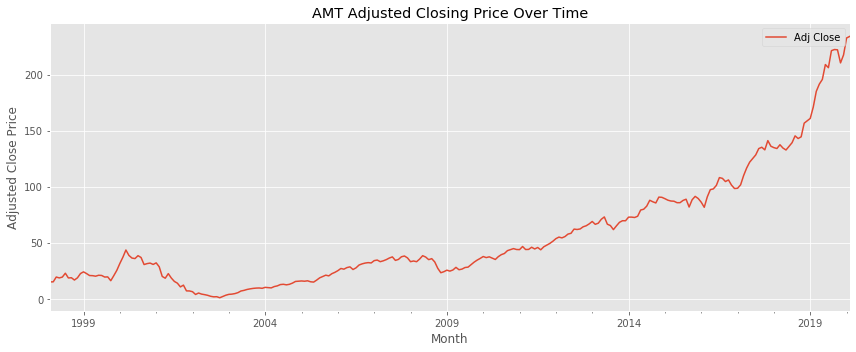

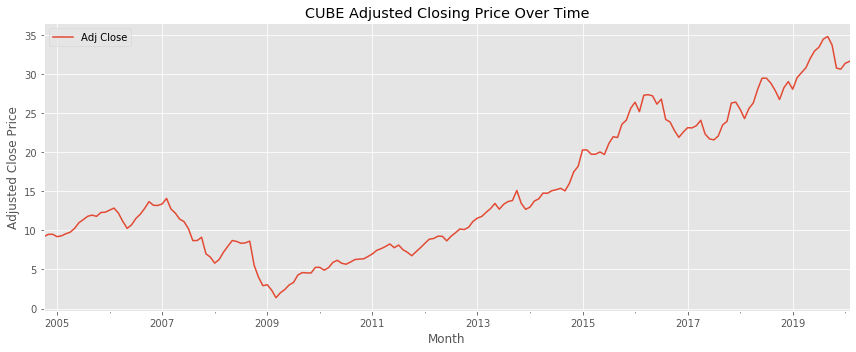

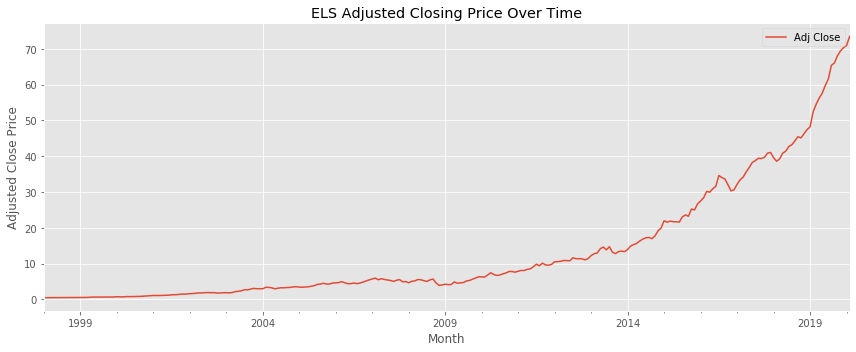

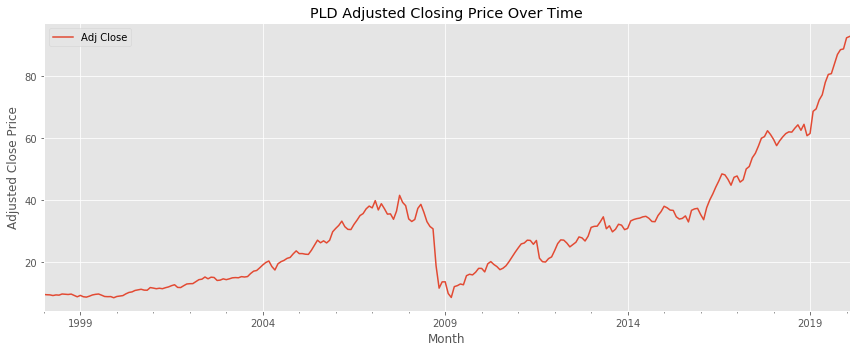

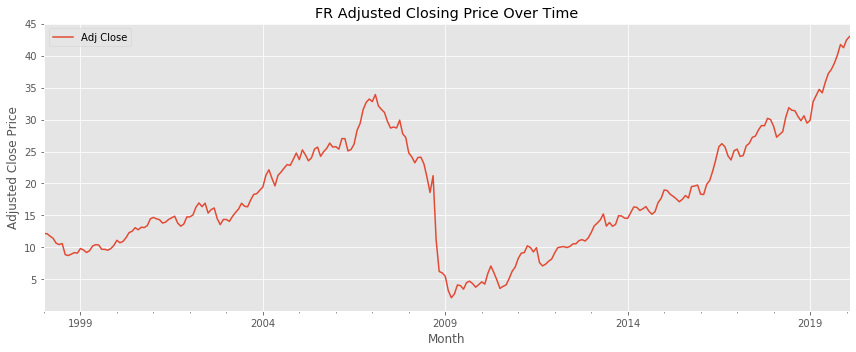

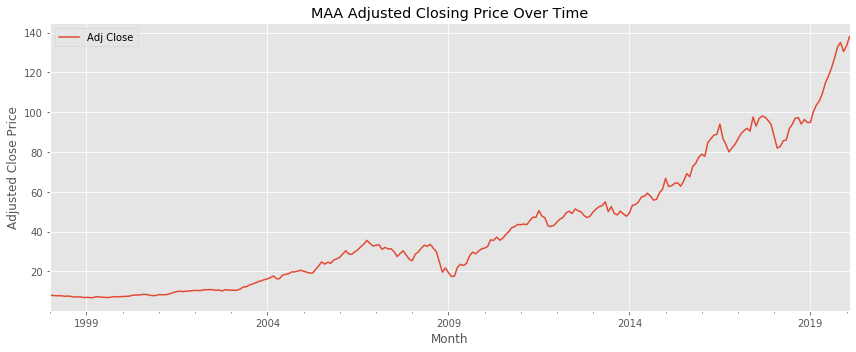

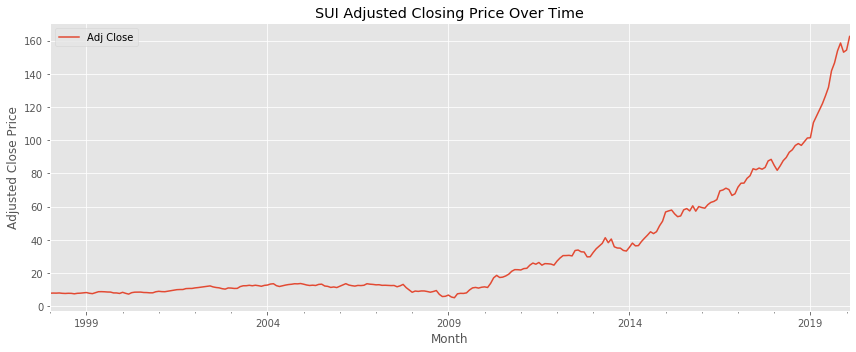

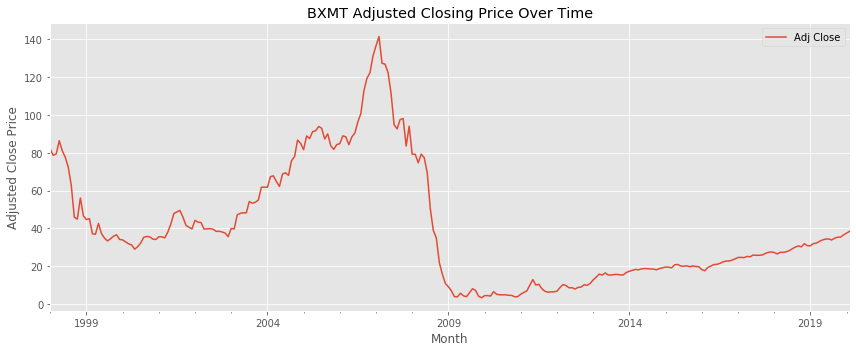

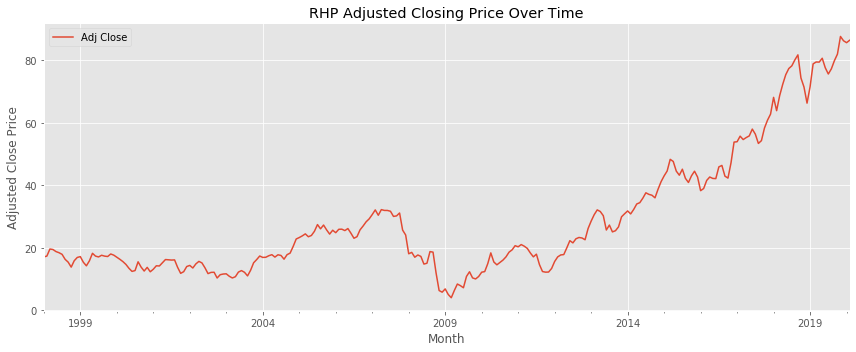

In [38]:
plot_reit_ts(reit_df_dict)

In [39]:
def decomposition(df_dict):
    for key in df_dict.keys():
        ts = df_dict[key]
        decomposition = seasonal_decompose(np.log(ts))
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid
    
        # Plot with subplots
        plt.figure(figsize=(10,6))
        plt.subplot(411)
        plt.plot(np.log(ts), label='Original', color="blue")
        plt.legend(loc='best')
        plt.title(f'{key}')
        plt.subplot(412)
        plt.plot(trend, label='Trend', color="blue")
        plt.legend(loc='best')
        plt.subplot(413)
        plt.plot(seasonal,label='Seasonality', color="blue")
        plt.legend(loc='best')
        plt.subplot(414)
        plt.plot(residual, label='Residuals', color="blue")
        plt.legend(loc='best')
        plt.tight_layout()
        
        

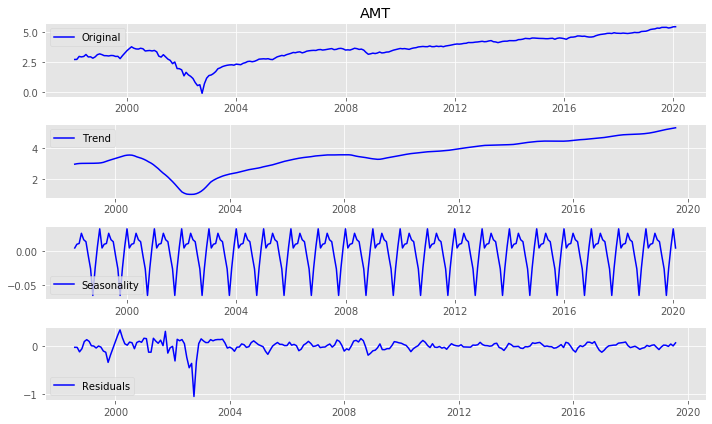

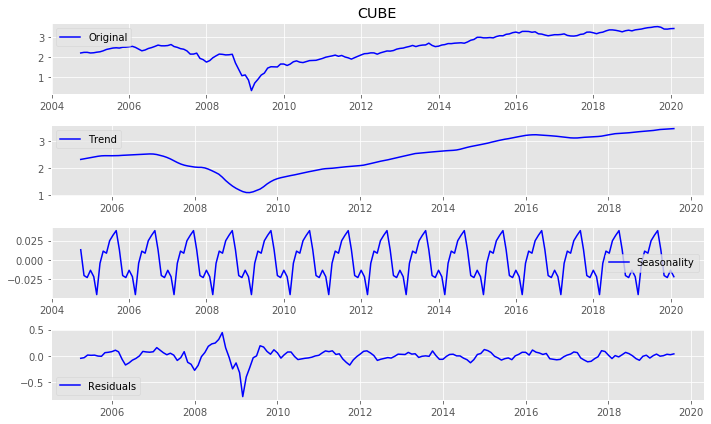

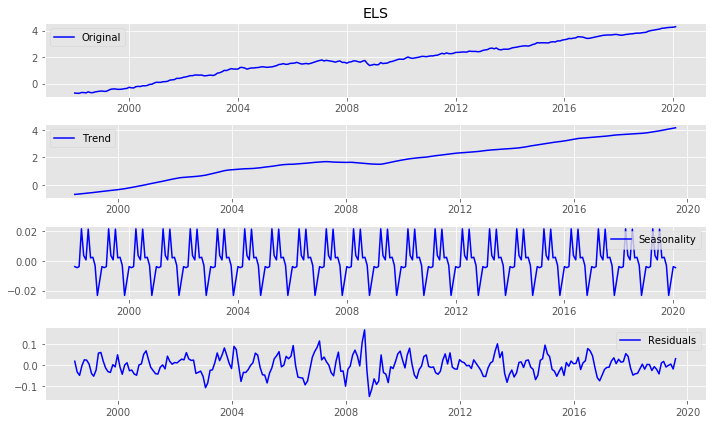

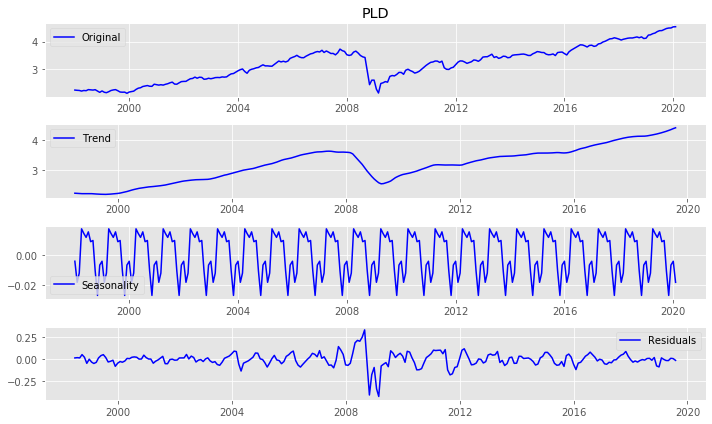

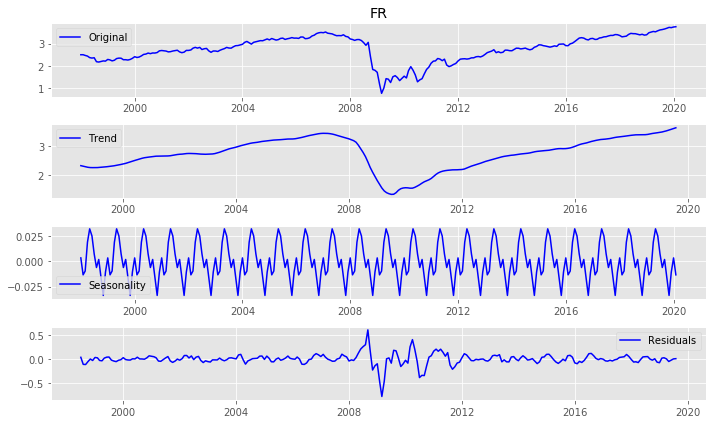

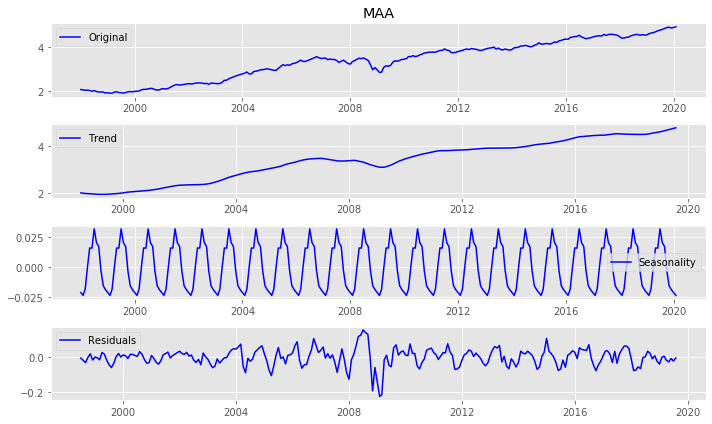

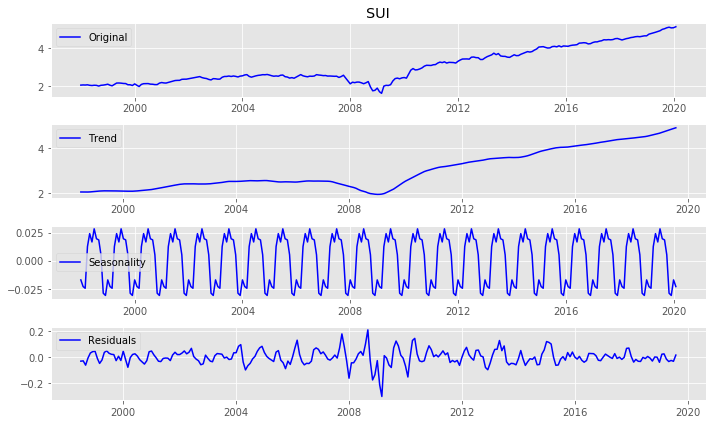

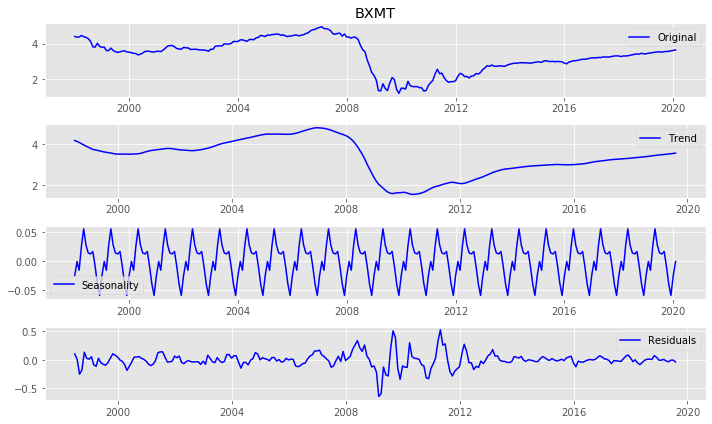

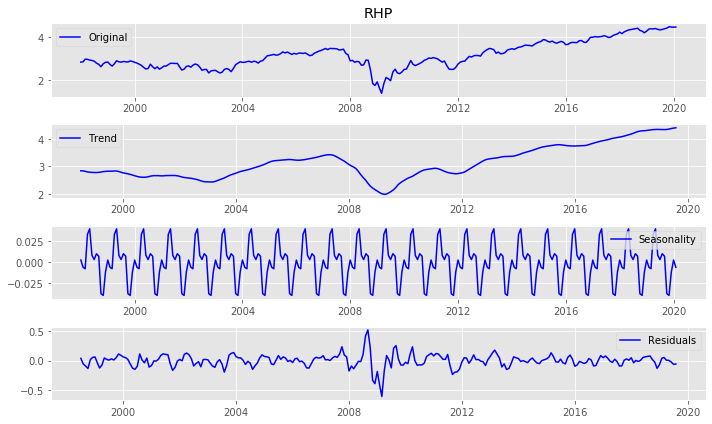

In [40]:
decomposition(reit_df_dict)

In [41]:
def differencing(df_dict):
    diff_df_dict = {}
    for key in df_dict.keys():
        diff_df_dict[key] = df_dict[key].diff(periods = 1).dropna()
        
    return diff_df_dict

In [42]:
#First order difference
diff1_reit_df_dict = differencing(reit_df_dict)

In [43]:
def dickey_fuller(df_dict):
    dftest_pvalue_dict = {}
    for key in df_dict.keys():
        dftest = adfuller(df_dict[key]['Adj Close'])
        dfoutput = pd.Series(dftest[0:4], index = ['Test Stat', 'p-value', '# lags used', '# Observations used'])
        dftest_pvalue_dict[key] = dftest[1]
        
    print(f'{((np.array(list(dftest_pvalue_dict.values())) < 0.05).sum() / len(df_dict)) * 100} % pass Dickey Fuller Test')

In [44]:
dickey_fuller(diff1_reit_df_dict)

100.0 % pass Dickey Fuller Test


In [45]:
def plot_partial_autocorrelation(df_dict):
    for key in df_dict.keys():
        plot_pacf(df_dict[key], lags = 12)
        plt.title(f'PACF - {key}')
        plt.show();

In [46]:
def plot_autocorrelation(df_dict):
    for key in df_dict.keys():
        plot_acf(df_dict[key], lags = 12)
        plt.title(f'ACF - {key}')
        plt.show();

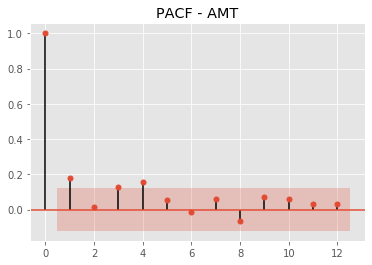

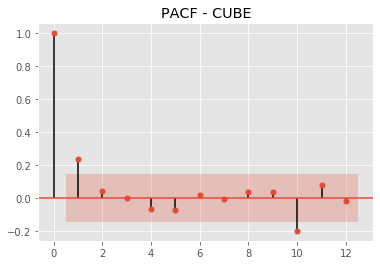

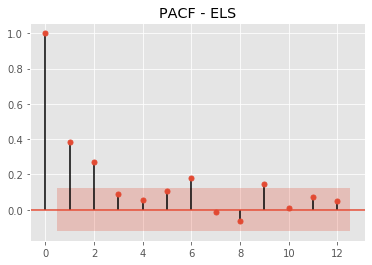

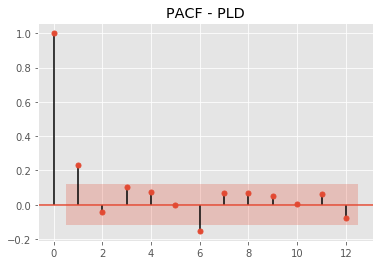

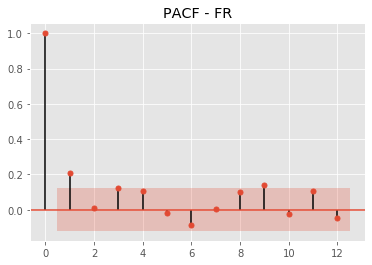

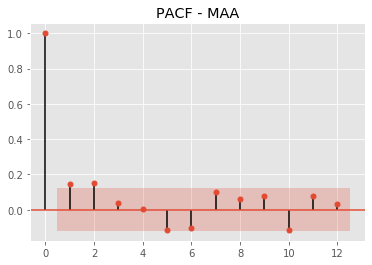

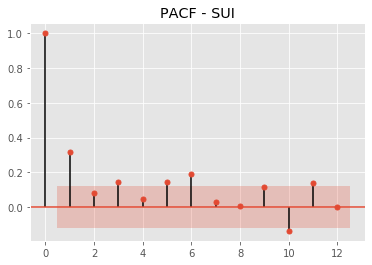

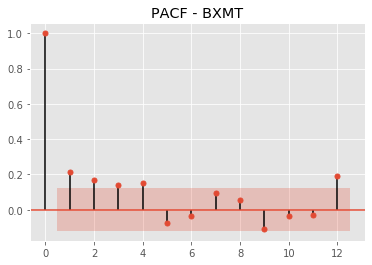

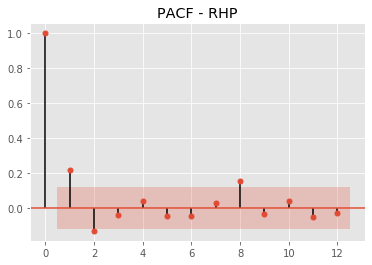

In [47]:
plot_partial_autocorrelation(diff1_reit_df_dict)

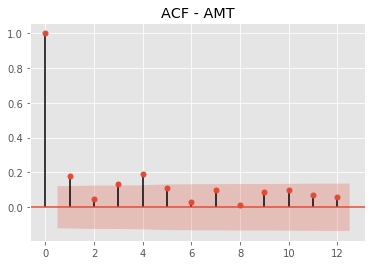

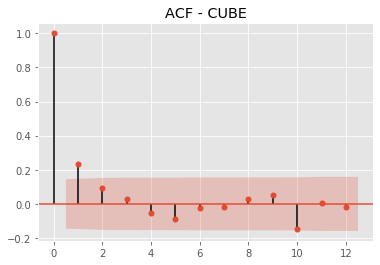

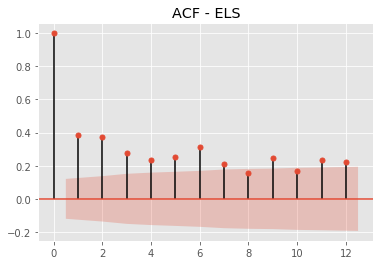

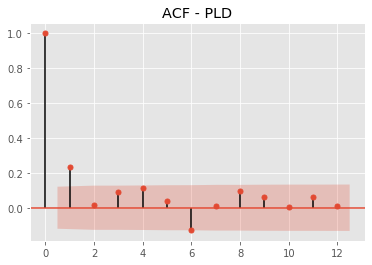

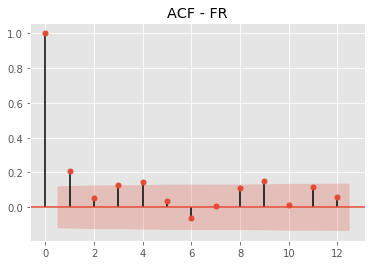

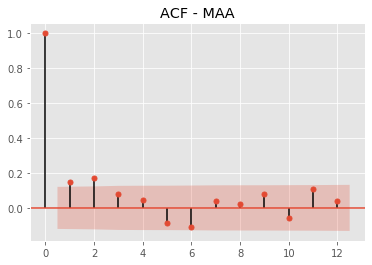

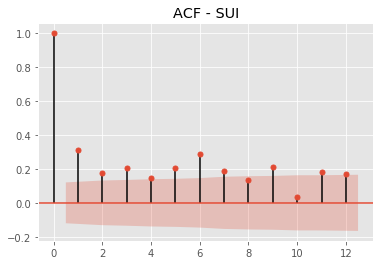

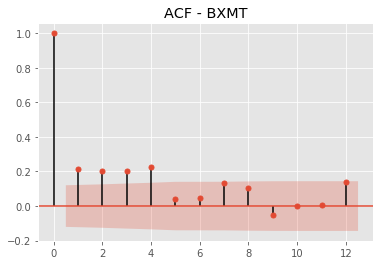

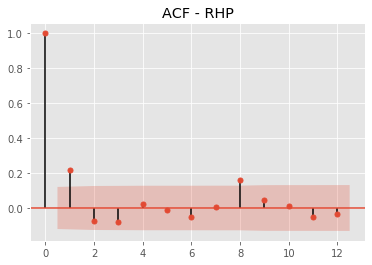

In [48]:
plot_autocorrelation(diff1_reit_df_dict)

In [ ]:
best_parameters1 = {}
for key in diff1_reit_df_dict.keys():
    best_parameters1[key] = ()
    
best_parameters1['AMT'] = (3,1,3)
best_parameters1['CUBE'] = (2,1,1)
best_parameters1['ELS'] = (3,1,3)
best_parameters1['PLD'] = (0,1,0)
best_parameters1['FR'] = (1,1,0)
best_parameters1['MAA'] = (1,1,0)
best_parameters1['SUI'] = (1,1,1)
best_parameters1['BXMT'] = (0,1,0)
best_parameters1['RHP'] = (2,1,0)


In [ ]:
best_seasonal_parameters1 = {}
for key in diff1_reit_df_dict.keys():
    best_seasonal_parameters1['AMT'] = (3,1,3, 12)
    best_seasonal_parameters1['CUBE'] = (2,1,1, 12)
    best_seasonal_parameters1['ELS'] = (3,1,3, 12)
    best_seasonal_parameters1['PLD'] = (0,1,0, 12)
    best_seasonal_parameters1['FR'] = (1,1,0, 12)
    best_seasonal_parameters1['MAA'] = (1,1,0, 12)
    best_seasonal_parameters1['SUI'] = (1,1,1, 12)
    best_seasonal_parameters1['BXMT'] = (0,1,0, 12)
    best_seasonal_parameters1['RHP'] = (2,1,0, 12)

In [ ]:
results_dict = {}
for key in reit_df_dict.keys():
    ts = reit_df_dict[key]
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts, order = best_parameters1[key],
                                            seasonal_order = best_seasonal_parameters1[key],
                                            enforce_stationarity = False,
                                            enforce_invertability = False)
    results = ARIMA_MODEL.fit()
    results_dict[key] = results
    print(f'{key} Summary {results.summary()}')
    print()
    print(f'{key} Diagnostics:')
    results.plot_diagnostics(figsize = (15,8))
    plt.show()
    print('---------------------------------------------------------------')

In [ ]:
best_parameters2 = {}
for key in diff1_reit_df_dict.keys():
    best_parameters2[key] = ()
    
best_parameters2['AMT'] = (3,1,2)
best_parameters2['CUBE'] = (1,1,1)
best_parameters2['EQIX'] = (2,1,2)
best_parameters2['PLD'] = (1,1,0)
best_parameters2['FR'] = (2,1,0)
best_parameters2['MAA'] = (0,1,0)
best_parameters2['SUI'] = (0,1,1)
best_parameters2['BXMT'] = (1,1,0)
best_parameters2['RHP'] = (1,1,0)

In [ ]:
best_seasonal_parameters2 = {}
for key in diff1_reit_df_dict.keys():
    best_seasonal_parameters2[key] = ()
    
best_seasonal_parameters2['AMT'] = (3,1,2, 12)
best_seasonal_parameters2['CUBE'] = (1,1,1, 12)
best_seasonal_parameters2['ELS'] = (2,1,2, 12)
best_seasonal_parameters2['PLD'] = (1,1,0, 12)
best_seasonal_parameters2['FR'] = (2,1,0, 12)
best_seasonal_parameters2['MAA'] = (0,1,0, 12)
best_seasonal_parameters2['SUI'] = (0,1,1, 12)
best_seasonal_parameters2['BXMT'] = (1,1,0, 12)
best_seasonal_parameters2['RHP'] = (1,1,0, 12)

In [ ]:
results_dict = {}
for key in reit_df_dict.keys():
    ts = reit_df_dict[key]
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts, order = best_parameters2[key],
                                            seasonal_order = best_seasonal_parameters2[key],
                                            enforce_stationarity = False,
                                            enforce_invertability = False,
                                            trend = 't')
    results = ARIMA_MODEL.fit()
    results_dict[key] = results
    print(f'{key} Summary {results.summary()}')
    print()
    print(f'{key} Diagnostics:')
    results.plot_diagnostics(figsize = (15,8))
    plt.show()
    print('---------------------------------------------------------------')

## Auto-ARIMA:

In [ ]:
reit_df_dict['AMT']

In [ ]:
for key in reit_df_dict.keys():
    #split each reit dataframe into a 70% train/30% test
    train, test = model_selection.train_test_split(np.split(reit_df_dict[key], [int(.70*len(reit_df_dict[key]))]))
    
    auto_arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, d =1,
                      seasonal=True, m=12,
                      start_p=0, start_q=0,
                      start_P=0, start_Q=0,
                      stationary=False,
                      with_intercept=False,
                      D=12, trend = 't')